# HW-02：Stata 基础命令练习
- 谢颂凯
- 23327087
- 简介: 使用 sysuse nlsw88.dta, clear 命令调入 Stata 数据文件 nls88.dta, 并完成如下统计分析

## 描述性统计
- 统计如下变量的平均值、标准差、中位数、最小值和最大值，并列表呈现出来，并输出为 Excel 或 Word 文档，名称为 Table01.xlsx 或 Table01.docx
- variable list : age grade wage hours ttl_exp tenure

In [3]:
ssc install asdoc
ssc install 
ssc install ftools
ssc install mkdensity

checking asdoc consistency and verifying not already installed...


Exception in thread Stata:
Traceback (most recent call last):
  File "D:\anaconda\Lib\threading.py", line 1043, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "D:\stata17\utilities\pystata\core\stout.py", line 169, in run
    raise SystemError(output)
SystemError: all files already exist and are up to date.
ssc install: nothing found where package name expected
r(198);



In [4]:
sysuse nlsw88.dta, clear

/* asdoc 输出 */

asdoc tabstat age grade wage hours ttl_exp tenure, ///
      stats(N mean sd median min max) ///
      columns(stats) save(Table01.docx) replace dec(3) ///
      title(表1：主要变量的描述性统计)

(NLSW, 1988 extract)

             |         N       Mean         SD        p50        Min 
-------------+-------------------------------------------------------
         age |      2246   39.15316   3.060002         39         34 
       grade |      2244   13.09893   2.521246         12          0 
        wage |      2246   7.766949   5.755523    6.27227   1.004952 
       hours |      2242   37.21811   10.50914         40          1 
     ttl_exp |      2246   12.53498   4.610208     13.125   .1153846 
      tenure |      2231    5.97785   5.510331   3.833333          0 

             |       Max 
-------------+-----------
         age |        46 
       grade |        18 
        wage |  40.74659 
       hours |        80 
     ttl_exp |  28.88461 
      tenure |  25.91667 
(file Table01.docx not found)
Click to Open File:  Table01.docx


## 产生变量
- age2 : 该变量的所有观察值等于 age 变量中相应观察值的平方
- ln_wage = ln(wage)  : 工资变量的自然对数
- wage_hour = wage/hours : 工资变量 wage 与小时 hours 的比值
- dum : 该变量是一个虚拟变量（dummy variable），其取值为：
    - dum = 1 如果某个妇女的 wage 大于所有妇女的平均工资
    - dum = 0 如果某个妇女的 wage 小于或等于所有妇女的平均工资

In [5]:
/*  1. 生成 age 的平方项 age2 */
gen age2 = age^2

/*  2. 生成 wage 的自然对数 ln_wage */
gen ln_wage = ln(wage)

/*  3. 生成时薪 wage_hour */
gen wage_hour = wage / hours

/*  4. 生成工资是否高于平均值的虚拟变量 dum */
summarize wage
gen dum = (wage > r(mean)) if !missing(wage)

(4 missing values generated)

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        wage |      2,246    7.766949    5.755523   1.004952   40.74659


## 绘图分析
- 绘制 ttl_exp 变量的直方图和密度函数图，分别保存/输出 (提示：可使用 graph export 命令) 为 His_ttl.png 和 Kendi_ttl.png，并作简单解释。
- 使用 mkdensity 命令绘制 industry 变量取值为 1,3,5,6,7,11 时，$\ln(wage)$ 变量的密度函数图，并做简要介绍。提示：你可以使用 des2 命令或 label list indlbl

(bin=33, start=.11538462, width=.87179486)
file His_ttl.png written in PNG format


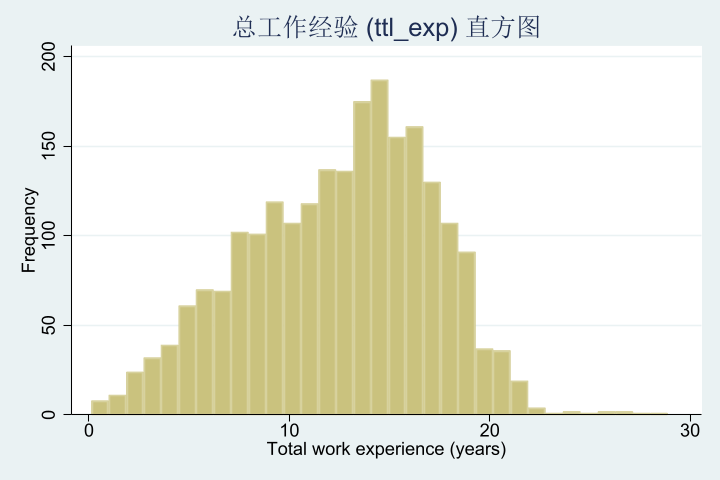

In [6]:
/* 绘制 ttl_exp 的直方图 */
histogram ttl_exp, freq title("总工作经验 (ttl_exp) 直方图")
graph export His_ttl.png, replace

可以看出，数据主要集中在10-18年左右，呈右偏态分布，即拥有非常长工作经验的女性数量较少，可能是由于较早的退休年龄和家庭原因退出职场所致。

file Kendi_ttl.png written in PNG format


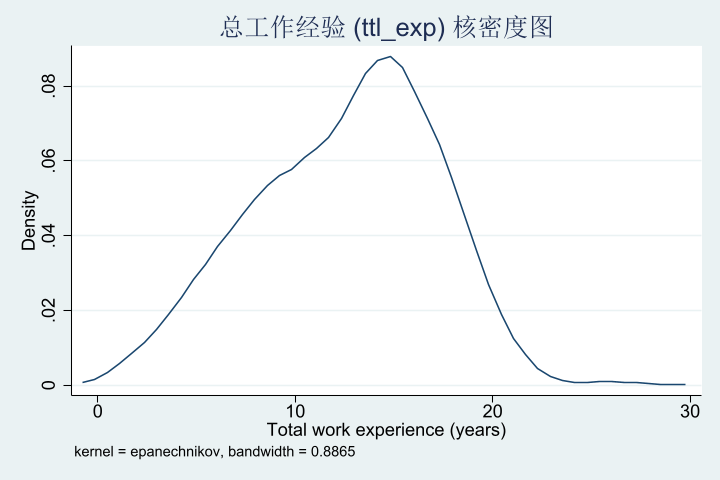

In [7]:
/* 绘制 ttl_exp 的核密度图 */
kdensity ttl_exp, title("总工作经验 (ttl_exp) 核密度图")
graph export Kendi_ttl.png, replace

直方图的平滑版本，更清晰地展示了数据分布的形态，同样表明总工作经验的分布是一个单峰且向右倾斜的分布。

indlbl:
           1 Ag/Forestry/Fisheries
           2 Mining
           3 Construction
           4 Manufacturing
           5 Transport/Comm/Utility
           6 Wholesale/Retail trade
           7 Finance/Ins/Real estate
           8 Business/Repair svc
           9 Personal services
          10 Entertainment/Rec svc
          11 Professional services
          12 Public administration
file ln_wage_distribution.png written in PNG format


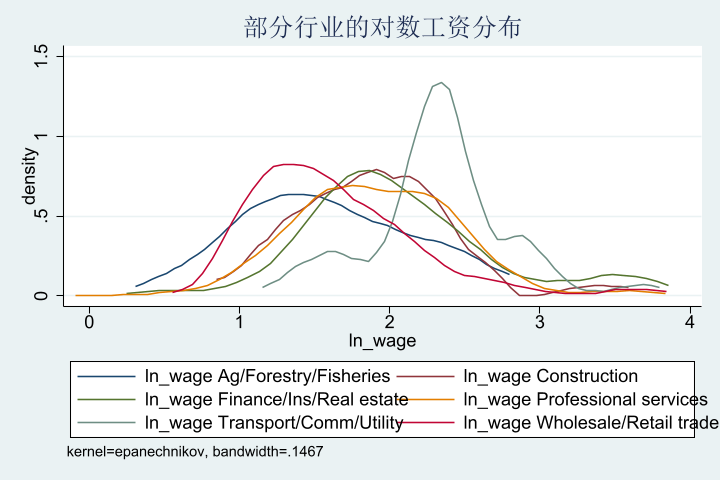

In [19]:
/* 查看行业代码与名称的对应关系 */
label list indlbl

/* 使用 mkdensity 绘制多个行业的 ln_wage 核密度图 */
mkdensity ln_wage if inlist(industry, 1, 3, 5, 6, 7, 11), ///
      over(industry) title("部分行业的对数工资分布")

* 导出图片
graph export ln_wage_distribution.png, replace

## 分行业统计
industry 变量表示妇女所在的行业，请做如下统计：
- (1) 每个行业的观察值个数；
- (2) 各个行业妇女的平均工资(wage)、平均工作时数(hours)、平均年龄(age)；
- (3) 列表统计不同行业中白种人、黑种人

In [9]:
 /* (1) 统计每个行业的观察值个数 */
tabulate industry

 /* (2) 统计各行业妇女的平均工资、工时和年龄 */
tabstat wage hours age, by(industry) stats(mean n)

 /* (3) 列表统计不同行业中各种族的比例 */
tabulate industry race, row


               Industry |      Freq.     Percent        Cum.
------------------------+-----------------------------------
  Ag/Forestry/Fisheries |         17        0.76        0.76
                 Mining |          4        0.18        0.94
           Construction |         29        1.30        2.24
          Manufacturing |        367       16.44       18.68
 Transport/Comm/Utility |         90        4.03       22.72
 Wholesale/Retail trade |        333       14.92       37.63
Finance/Ins/Real estate |        192        8.60       46.24
    Business/Repair svc |         86        3.85       50.09
      Personal services |         97        4.35       54.44
  Entertainment/Rec svc |         17        0.76       55.20
  Professional services |        824       36.92       92.11
  Public administration |        176        7.89      100.00
------------------------+-----------------------------------
                  Total |      2,232      100.00

Summary statistics: Mean, N
Group 

1. 妇女主要从事 Professional services,  Manufacturing, Wholesale/Retail trade 行业工作，人数分别为 824, 367, 333 人
2. Mining 行业工资最高, Manufacturing 行业工作时长最长
3. Mining 行业白人占比最高，达到 100% ，黑人中， Personal services 行业占比最高，达到 46.39%， 其他族裔各行业最高占比不超过 3%。

## 定义 Race 变量中的数值
- 1 —— 白种人
- 2 —— 黑种人
- 3 —— 其它

In [10]:
/* 定义一个名为 race_label 的标签 */
label define race_label 1 "白种人" 2 "黑种人" 3 "其它"

/* 将这个标签应用到 race 变量上 */
label values race race_label

/* 查看结果 */
tabulate race


       Race |      Freq.     Percent        Cum.
------------+-----------------------------------
     白种人 |      1,637       72.89       72.89
     黑种人 |        583       25.96       98.84
       其它 |         26        1.16      100.00
------------+-----------------------------------
      Total |      2,246      100.00


## 续别变量转类别变量
- (1) 产生一个新变量 G_age，取值规则为：若 age<=37，则 G_age=1；若 37<age<=42，则 G_age=2；若 age>42，则 G_age=3;
- (2) 为 G_age 变量添加 “数字-文字”对应表 ，对应关系为：1 “37岁以下”；2 “38到42岁之间”；3 “43岁以上”。

In [11]:
* (1) 使用 recode 命令生成 G_age
recode age (min/37=1) (38/42=2) (43/max=3), gen(G_age)

* (2) 为 G_age 添加标签
label define Gage_label 1 "37岁以下" 2 "38到42岁之间" 3 "43岁以上"
label value G_age Gage_label

* 查看新变量的分布情况
tabulate G_age

(2246 differences between age and G_age)

   RECODE of |
 age (Age in |
     current |
       year) |      Freq.     Percent        Cum.
-------------+-----------------------------------
    37岁以下 |        795       35.40       35.40
38到42岁之间 |      1,043       46.44       81.83
    43岁以上 |        408       18.17      100.00
-------------+-----------------------------------
       Total |      2,246      100.00


结果如下:
```stata
(2246 differences between age and G_age)

   RECODE of |
 age (Age in |
     current |
       year) |      Freq.     Percent        Cum.
-------------+-----------------------------------
    37岁以下 |        795       35.40       35.40
38到42岁之间 |      1,043       46.44       81.83
    43岁以上 |        408       18.17      100.00
-------------+-----------------------------------
       Total |      2,246      100.00
```

## 工资分布
- (1) 在一张图中绘制白人 (race==1) 和黑人 (race==2) 妇女的工资 (wage) 的核密度函数图，并做简要分析。(Tips: 参见推文 . lianxh 密度)
- (2) 用柱状图呈现白人 (race==1) 和黑人 (race==2) 妇女的工资 (wage) 在不同行业 (industry) 的分布特征。

In [12]:
lianxh 直方图 柱状图 条形

  
>>专题：Stata绘图
  万莉, 2020, Stata绘图全解：绘图语法-条形图-箱型图-散点图-矩阵图-直方图-点图-
> 饼图
  万莉, 2021, Stata绘图：世行可视化案例-条形图-密度函数图-地图-断点回归图-散点
> 图
  万莉, 2020, Stata：读懂直方图
 
>>专题：Stata命令
  刘欣妍, 史柯, 2022, Stata：描述性统计分析新命令-dstat
  吴小齐, 2024, Stata绘图：高级柱状图(二)-离散变量之间关系的可视化
  孙晓艺, 2024, Stata绘图大礼包：27个常用的可视化范例及代码
  张祖冲, 2025, disfit：随心所欲拟合各种常见分布函数-Python
  徐阳, 2021, Stata绘图：柱状图专题-T212
  汪京, 2024, multihistogram-多变量直方图
  范思妤, 2022, Stata绘图：环形柱状图-实时全球新冠确诊人数
  袁子晴, 2021, 史上最牛Stata绘图模板-schemepack：酷似R中的ggplot2
 
>>专题：Stata教程
  谢作翰, 2019, 普林斯顿Stata教程(二) - Stata绘图
  谢嘉伟, 2024, Stata 绘图：binscatterhist-分仓散点图+直方图
  连享会, 2020, Stata绘图：多维柱状图绘制
  郑宇, 2024, Stata绘图：加权直方图
  颜国强, 2024, 相同的数据、不同的视角：可视化如何影响数据解读
  马洪栋, 2024, Stata绘图：高级柱状图（一）-均值和置信区间-cibar-coefpl
  马洪栋, 2024, Stata绘图：高级柱状图（三）-堆叠柱状图


file wage_divided_by_race_distribution.png written in PNG format


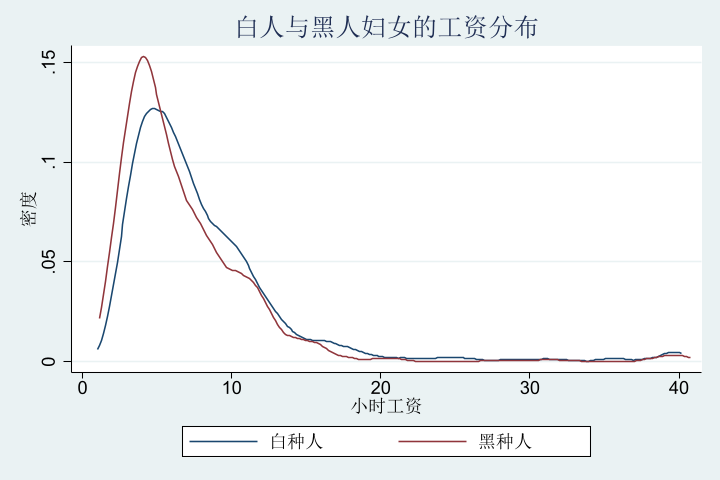

In [20]:
twoway (kdensity wage if race==1) (kdensity wage if race==2), ///
       title("白人与黑人妇女的工资分布") ///
       legend(label(1 "白种人") label(2 "黑种人")) ///
       xtitle("小时工资") ytitle("密度")
graph export wage_divided_by_race_distribution.png, replace

1. 工资分布都呈严重右偏状态，整体上看白人女性略微由于黑人女性
2. 曲线的重叠部分反映了两个群体工资水平相似的区间，观察到从 $20/小时 开始，黑人女性和白人女性的工资分布基本重叠，说明可能肤色对高技术职业和高收入群体影响不大

file wage_divided_by_industry_distribution_v1.png written in PNG format


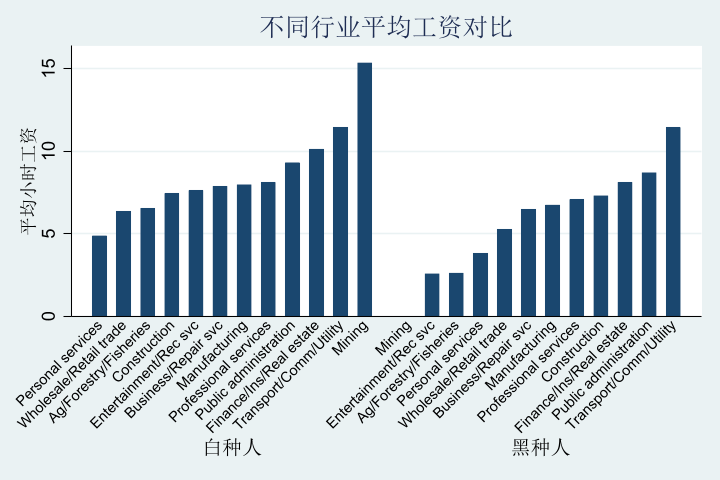

In [29]:
graph bar (mean) wage if inlist(race, 1, 2), over(industry,sort(1) label(angle(45) labsize(small))) over(race,sort(1) descending) ///
      title("不同行业平均工资对比") ///
      ytitle("平均小时工资") 
graph export wage_divided_by_industry_distribution_v1.png, replace

file wage_divided_by_race_distribution_v2.png written in PNG format


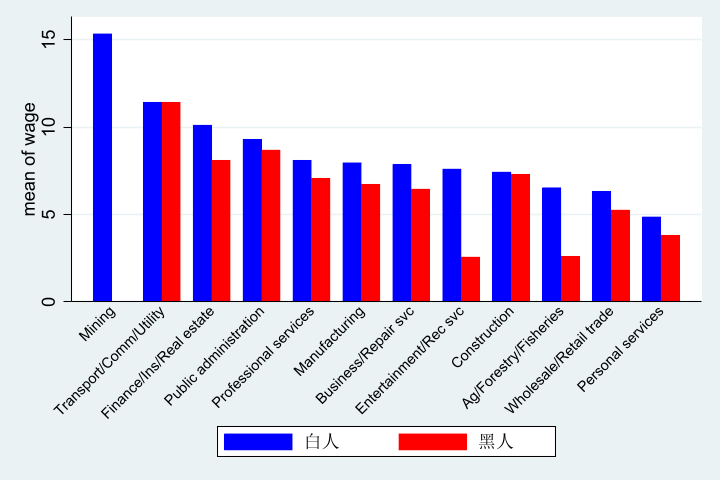

In [23]:
graph bar (mean) wage if inlist(race, 1, 2), ///
    over(race) ///
    over(industry, sort(1) descending label(angle(45) labsize(small))) ///
    asyvars ///
    bar(1, color(blue)) ///
    bar(2, color(red)) ///
    legend(label(1 "白人") label(2 "黑人"))
graph export wage_divided_by_race_distribution_v2.png, replace


## 基本回归分析
- 使用 regress 命令估计各个行业的 (industry) 的平均工资，以及工资的行业差异 (基准组可以自行设定)。
- 然后，使用 margins 和 marginsplot 命令呈现上一步的估计结果，并在绘图时添加每个估计值的置信区间。
- 模型设定如下:
    - $\ln(wage) = a_i + a_j + \beta_1*\ln(hour) + \beta_2*Black + \beta_3* Black ✖ \ln(hour) + \gamma*Controls + u $
    - 其中，
        - $a_i$ 表示行业固定效应，可以基于 industry 变量来界定;
        - $a_j$ 表示职业固定效应，可以基于 occupation 变量来界定;
        - $\ln(wage)$, $\ln(hour)$分别是 wage 和 hours 变量的自然对数；
        - Controls 十一组控制变量，包括 age, age^2，i.race，ttl_exp。 请分别使用 regress, areg, reghdfe 估计上述模型，并简要解释 $\hat{\beta_1}$ 和 $\hat{\beta_3}$ 的经济含义


      Source |       SS           df       MS      Number of obs   =     2,232
-------------+----------------------------------   F(11, 2220)     =     13.80
       Model |  4743.21081        11  431.200983   Prob > F        =    0.0000
    Residual |   69374.068     2,220  31.2495802   R-squared       =    0.0640
-------------+----------------------------------   Adj R-squared   =    0.0594
       Total |  74117.2788     2,231  33.2215503   Root MSE        =    5.5901

------------------------------------------------------------------------------
        wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    industry |
     Mining  |   9.728472   3.106542     3.13   0.002     3.636439     15.8205
Construct~n  |   1.943813   1.707566     1.14   0.255    -1.404781    5.292407
Manufactu~g  |   1.880457   1.386852     1.36   0.175    -.8392066     4.60012
Transport~y  |   5.822232   1.47831

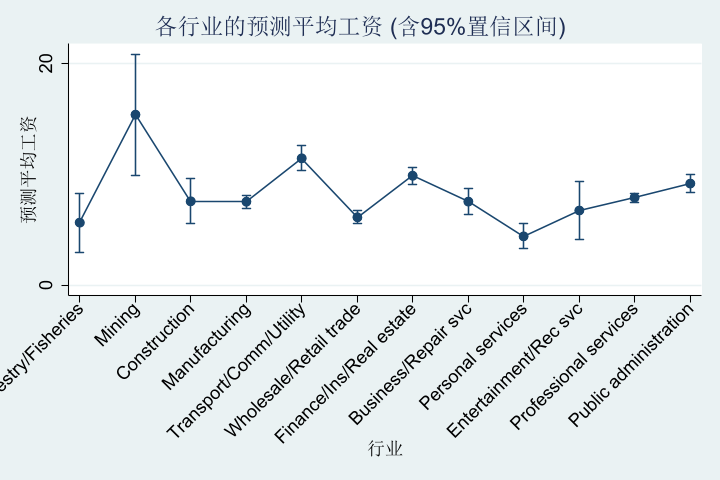

In [38]:
/* * 使用 regress 估计各行业的平均工资 */
regress wage i.industry

/* * 使用 margins 计算每个行业的预测平均工资 */
margins industry

/* * 使用 marginsplot 将结果可视化 */
marginsplot, title("各行业的预测平均工资 (含95%置信区间)") ///
             xtitle("行业") ytitle("预测平均工资") ///
             xlabel(,angle(45))
graph export predicted_wage_by_industry.png, replace

In [ ]:
* 生成 ln_hours 变量
gen ln_hours = ln(hours)
gen black = (race == 2)

In [ ]:
* 模型变量设定说明：
* ln(wage) = 因变量
* 固定效应: i.industry, i.occupation
* 核心自变量: c.ln_hours##i.race (这会自动包含ln_hours, i.race, 以及它们的交互项)
* 控制变量: age, age2, ttl_exp
local controls age age2 ttl_exp

/* * 方法一：使用 regress (适合固定效应维度不高时) */
regress ln_wage c.ln_hours##i.black age age2 ttl_exp i.industry i.occupation, vce(robust)

/* * 方法二：使用 areg (吸收一个固定效应) */
areg ln_wage c.ln_hours##i.black age age2 ttl_exp i.occupation, absorb(industry) vce(robust)

/* * 方法三：使用 reghdfe (推荐，可吸收多个高维固定效应) */

reghdfe ln_wage c.ln_hours##i.black age age2 ttl_exp, absorb(industry occupation) vce(robust)


Linear regression                               Number of obs     =      2,224
                                                F(28, 2194)       =          .
                                                Prob > F          =          .
                                                R-squared         =     0.3544
                                                Root MSE          =     .46378

------------------------------------------------------------------------------
             |               Robust
     ln_wage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    ln_hours |   .0375085   .0285821     1.31   0.190    -.0185422    .0935592
     1.black |  -.4043672   .2788674    -1.45   0.147    -.9512389    .1425045
             |
       black#|
  c.ln_hours |
          1  |   .0900928   .0768485     1.17   0.241    -.0606106    .2407962
             |
         age |   .0837875   .0827

$\hat{\beta_1}$ 和 $\hat{\beta_3}$ 的经济含义:
- $\hat{\beta_1}$ = 0.0375:
    - 经济含义: 这个系数代表了基准群体(在这里是白人妇女，race = 1 )的工资-工时弹性。由于因变量和自变量都取了对数，系数可以直接解释为弹性。具体来说，在控制了年龄、工作经验、行业和职业等因素后，对于白人妇女，她们的工作小时数每增加 1%，其小时工资平均增加约 0.0375%;
    - 统计显著性: 该系数的 P 值为 0.190，大于常规的显著性水平（如 0.05 或 0.10）。这意味着，这个结果在统计上是不显著的。我们没有充分的统计证据表明，在控制了其他变量后，工作小时数的增加对白人妇女的工资有显著影响。
- $\hat{\beta_3}$ = −0.404:
    - 经济含义: 交互项的系数，它衡量的是黑人妇女 (race = 2) 相对于基准群体（白人妇女）工资-工时弹性的差异，这个正系数意味着，黑人妇女的工资-工时弹性比白人妇女要低 0.404，这大致相当于低了 $100×(e^{−0.404}−1)≈33.2%$ 的工资;
    - 统计显著性: 该系数的 P 值为 0.147，同样在统计上不显著。这意味着，在控制了其他因素后，我们没有充分的统计证据表明黑人妇女和白人妇女的工资-工时弹性存在差异